# **Stochastic Gradient Descent Regression Models for Random Data**

This Jupyter Notebook creates a random linear dataset with Gaussian noise added to the following equation: y = 5 + 2X<sub>1</sub>. It employs the [numpy.random.rand()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) function from the [NumPy](https://numpy.org/) library to add random noise to the linear data. Then, this Jupyter Notebook uses the [SGDRegressor](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDRegressor.html) class from the
 [Scikit-Learn](https://scikit-learn.org/stable/) library
([Pedregosa et al., 2011](https://doi.org/10.48550/arXiv.1201.0490)) to
build regression models for this toy dataset. The following code is similar to Jupyter Notebooks discussed by
[Géron, 2023](https://www.isbns.net/isbn/9781098125974/).
<br> </br>
<img src="https://drive.usercontent.google.com/download?id=1HttLaxOndVqcJqh3mA3-IYvi6E1yUVKu&export=view&authuser=0" width=520 alt="Dice">
<br><i>This image shows dice as an analogy of random data. Source: Pixabay: https://pixabay.com/illustrations/beaker-dices-cubes-play-random-3261101/</i></br>
<br> </br>
**References**
<br> </br>
Géron, A. Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow 3e: Concepts, Tools, and Techniques to Build Intelligent Systems, 3rd ed.; O’Reilly Media: Sebastopol, CA, 2023.
[ISBN: 978-1-098-12597-4](https://www.isbns.net/isbn/9781098125974/)
<br> </br>
Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, Blondel M, Prettenhofer P, Weiss R, Dubourg V, Verplas J, Passos A, Cournapeau D, Brucher M, Perrot M, Duchesnay E. Scikitlearn: Machine Learning in Python. J Mach Learn Res., 2011; 12:2825–2830.
[DOI: 10.48550/arXiv.1201.0490](https://doi.org/10.48550/arXiv.1201.0490)
<br> </br>
It follows the code.


Generating and plotting random linear data......done!

Generating regression models and plotting it......

Model 1: y = 5.4601 + 2.0234 * X1 (MSE: 0.0925) 

Model 2: y = 5.5224 + 1.9489 * X1 (MSE: 0.0885) 

Model 3: y = 5.6194 + 2.0710 * X1 (MSE: 0.1939) 

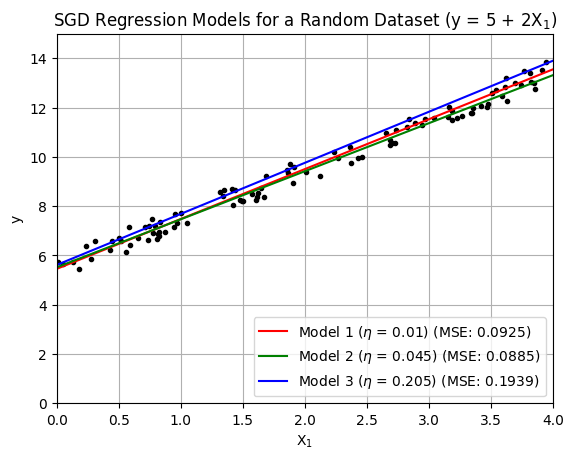


done!


In [ ]:
#!/usr/bin/env python3
#
################################################################################
# Dr. Walter F. de Azevedo, Jr.                                                #
# [Scopus](https://www.scopus.com/authid/detail.uri?authorId=7006435557)       #
# [GitHub](https://github.com/azevedolab)                                      #
# July 20, 2024                                                                #
################################################################################
#
################################################################################
# Import section                                                               #
################################################################################
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

################################################################################
# Randomly generated linear dataset                                            #
################################################################################
msg_out = "\nGenerating and plotting random linear data..."
print(msg_out,end="...")
np.random.seed(1123581321)          # Set up a random seed
X = 4*np.random.rand(100,1)
y = 5 + np.random.rand(100,1) + 2*X
X_b = np.c_[np.ones((100,1)), X]    # Add x0 = 1 to each instance

# Plotting randomly generated linear dataset
plt.title("Randomly Generated Linear Dataset (y = 5 + 2X$_1$)")
plt.plot(X,y, ".", color = "black")
plt.xlabel("X$_{1}$")
plt.ylabel("y")
plt.axis([0,4,0,15])
plt.grid()
plt.savefig("sgdregressor_random_data.pdf",dpi=1500)
plt.close()
print("done!")

################################################################################
# Generate a regression models                                                 #
################################################################################
msg_out = "\nGenerating regression models and plotting it..."
print(msg_out,end="...")

# Initial plotting
plt.title("SGD Regression Models for a Random Dataset (y = 5 + 2X$_1$)")
plt.plot(X,y,".", color = "black")
plt.xlabel("X$_{1}$")
plt.ylabel("y")
plt.axis([0,4,0,15])
plt.grid()

# Generate regression models and plot them
# Set up an new array for predictions
X_in = np.array([[0],[4]])
X_in_b = np.c_[np.ones((2,1)), X_in] # Add x0 = 1 to each instance

# Set up lists for regression models
eta_lst = [0.01,0.045, 0.205]  # Learning rate
color_lst = ["red","green","blue"]

# Looping through regression models
for i,eta in enumerate(eta_lst):

    # Regression
    from sklearn.utils.validation import column_or_1d
    y = column_or_1d(y, warn=False)
    lin_reg = SGDRegressor(learning_rate = "constant", eta0 = eta).fit(X,y)

    # Prediction
    theta_vector = np.array([lin_reg.intercept_[0],lin_reg.coef_[0]])
    y_predict = X_in_b.dot(theta_vector)

    # Prediction for metrics
    y_predict4metrics = X_b.dot(theta_vector)

    # Calculate MSE
    mse = mean_squared_error(y, y_predict4metrics)
    mse_out = "\n\nModel "+str(i+1)
    mse_out += ": y = {:.4f} + {:.4f} * X1 ".format(theta_vector[0],
                                                theta_vector[1])
    mse_out += "(MSE: {:.4f})".format(mse)
    print(mse_out, end = " ")

    # Plotting
    label_in = "Model "+str(i+1)+" ($\\eta$ = "+str(eta)+")"
    label_in += " (MSE: {:.4f})".format(mse)
    plt.plot(X_in,y_predict, "-", color = color_lst[i],
                    label = label_in)
    plt.legend(loc="lower right")

# Save plot
plt.savefig("sgdregressor_regression_5_plus_2x.pdf",dpi=1500)
plt.show()
print("\ndone!")
################################################################################